In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('Thyroid_Diff.csv')

print(f"Shape dataset: {df.shape}")
print(f"Jumlah record: {len(df)}")
print(f"Jumlah attribute: {len(df.columns)}")

Shape dataset: (383, 17)
Jumlah record: 383
Jumlah attribute: 17


In [4]:
print("5 Data Teratas dari Dataset Thyroid_Diff.csv:")
print("=" * 120)
print(df.head())

5 Data Teratas dari Dataset Thyroid_Diff.csv:
   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0   

## **Statistik Deskriptif untuk Attribute Bertipe Angka**

In [22]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"Attribute numerik: {list(numeric_columns)}")

if len(numeric_columns) > 0:
    stats = df[numeric_columns].describe()
    stats.loc['Q1'] = df[numeric_columns].quantile(0.25)
    stats.loc['Q2'] = df[numeric_columns].quantile(0.50)  
    stats.loc['Q3'] = df[numeric_columns].quantile(0.75)
    stats.loc['std'] = df[numeric_columns].std()
    stats.loc['variance'] = df[numeric_columns].var()
    stats.loc['skewness'] = df[numeric_columns].skew()
    
    stats = stats.reindex(['count', 'mean', 'std', 'variance', 'skewness', 'min', 'Q1', 'Q2', 'Q3', 'max'])
    print(stats.round(2))
else:
    print("Tidak ada attribute numerik")

Attribute numerik: ['Age']
             Age
count     383.00
mean       40.87
std        15.13
variance  229.05
skewness    0.72
min        15.00
Q1         29.00
Q2         37.00
Q3         51.00
max        82.00


## **10 Record Pertama dengan Attribute Bertipe Angka**

In [5]:
print("10 Record Pertama dengan Atribut Numerik:")
print("=" * 50)
print(df[['Age']].head(10))

10 Record Pertama dengan Atribut Numerik:
   Age
0   27
1   34
2   30
3   62
4   62
5   52
6   41
7   46
8   51
9   40


## **Informasi Dataset**

In [6]:
print("INFORMASI DATASET THYROID_DIFF.CSV")
print("=" * 50)

# jumlah record dan attribute
print(f"Jumlah Record (Baris): {df.shape[0]}")
print(f"Jumlah Attribute (Kolom): {df.shape[1]}")
print()

# nama attribute
print("Nama Attribute:")
print("-" * 20)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print()

# jumlah attribute dengan tipe angka
numeric_columns = df.select_dtypes(include=['number']).columns
print(f"Jumlah Attribute dengan Tipe Angka: {len(numeric_columns)}")
print("Attribute Numerik:")
print("-" * 20)
for col in numeric_columns:
    print(f"- {col} (tipe: {df[col].dtype})")
print()

# tipe data semua attribute
print("Tipe Data Semua Attribute:")
print("-" * 30)
print(df.dtypes)

INFORMASI DATASET THYROID_DIFF.CSV
Jumlah Record (Baris): 383
Jumlah Attribute (Kolom): 17

Nama Attribute:
--------------------
 1. Age
 2. Gender
 3. Smoking
 4. Hx Smoking
 5. Hx Radiothreapy
 6. Thyroid Function
 7. Physical Examination
 8. Adenopathy
 9. Pathology
10. Focality
11. Risk
12. T
13. N
14. M
15. Stage
16. Response
17. Recurred

Jumlah Attribute dengan Tipe Angka: 1
Attribute Numerik:
--------------------
- Age (tipe: int64)

Tipe Data Semua Attribute:
------------------------------
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object


## **Jumlah Label untuk Attribute Object**

In [7]:
print("JUMLAH LABEL UNTUK ATTRIBUTE BERTIPE OBJECT")
print("=" * 60)

# filter kolom dengan tipe object
object_columns = df.select_dtypes(include=['object']).columns

# tampilkan jumlah label untuk setiap attribute object
for col in object_columns:
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    print(f"\n{col}:")
    print(f"  Jumlah Label: {unique_count}")
    print(f"  Nilai Unik: {list(unique_values)}")

JUMLAH LABEL UNTUK ATTRIBUTE BERTIPE OBJECT

Gender:
  Jumlah Label: 2
  Nilai Unik: ['F', 'M']

Smoking:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Hx Smoking:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Hx Radiothreapy:
  Jumlah Label: 2
  Nilai Unik: ['No', 'Yes']

Thyroid Function:
  Jumlah Label: 5
  Nilai Unik: ['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']

Physical Examination:
  Jumlah Label: 5
  Nilai Unik: ['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']

Adenopathy:
  Jumlah Label: 6
  Nilai Unik: ['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']

Pathology:
  Jumlah Label: 4
  Nilai Unik: ['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell']

Focality:
  Jumlah Label: 2
  Nilai Unik: ['Uni-Focal', 'Multi-Focal']

Risk:
  Jumlah Label: 3
  Nilai Unik: ['Low', 'Intermediate', 'High']

T:
  Jumlah Label:

## **Visualisasi Dataset**

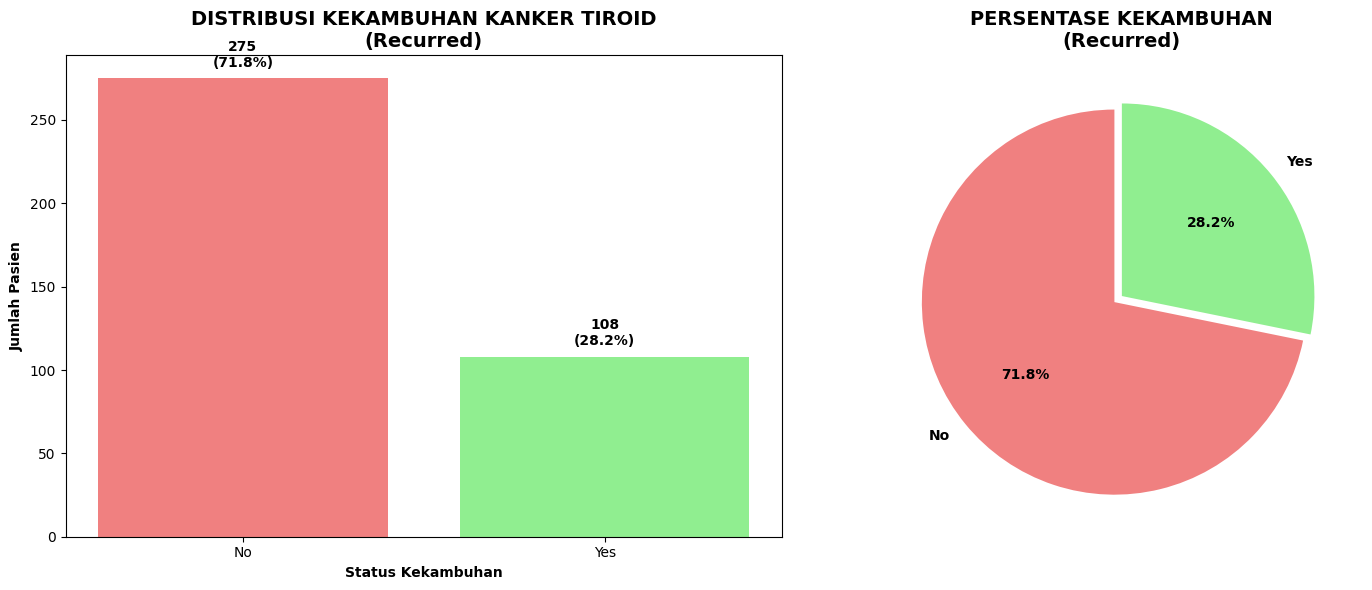

<Figure size 1200x600 with 0 Axes>

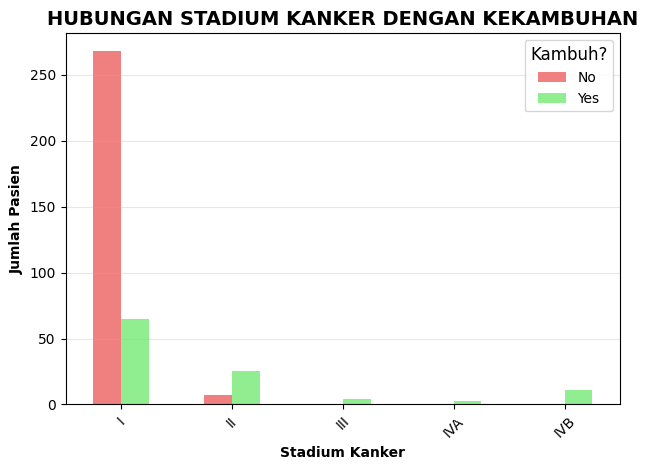

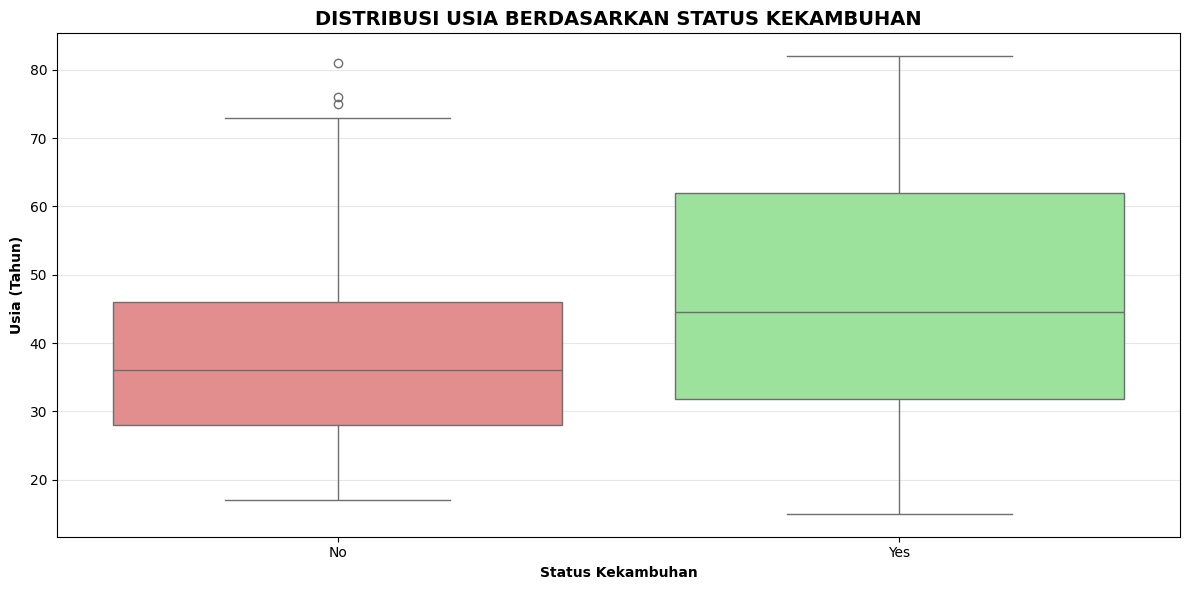


ANALISIS KEKAMBUHAN KANKER TIROID - STATISTIKA
Total Pasien: 383
Pasien Tidak Kambuh: 275 (71.8%)
Pasien Kambuh: 108 (28.2%)
Rasio Kekambuhan: 1:2

Distribusi Kekambuhan berdasarkan Stadium:
Recurred     No   Yes  Total  Persentase_Kambuh
Stage                                          
I         268.0  65.0  333.0               19.5
II          7.0  25.0   32.0               78.1
III         0.0   4.0    4.0              100.0
IVA         0.0   3.0    3.0              100.0
IVB         0.0  11.0   11.0              100.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

# visualisasi 1: distribusi kekambuhan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# bar chart - distribusi kekambuhan
recurred_counts = df['Recurred'].value_counts()
bars = ax1.bar(recurred_counts.index, recurred_counts.values, color=['lightcoral', 'lightgreen'])
ax1.set_title('DISTRIBUSI KEKAMBUHAN KANKER TIROID\n(Recurred)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Status Kekambuhan', fontweight='bold')
ax1.set_ylabel('Jumlah Pasien', fontweight='bold')

for bar, count in zip(bars, recurred_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{count}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

# pie chart - persentase kekambuhan
colors = ['lightcoral', 'lightgreen']
explode = (0.05, 0)  
ax2.pie(recurred_counts.values, labels=recurred_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, startangle=90, textprops={'fontweight': 'bold'})
ax2.set_title('PERSENTASE KEKAMBUHAN\n(Recurred)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# visualisasi 2: hubungan stage dengan kekambuhan
plt.figure(figsize=(12, 6))
stage_recurred = pd.crosstab(df['Stage'], df['Recurred'])
stage_recurred.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('HUBUNGAN STADIUM KANKER DENGAN KEKAMBUHAN', fontsize=14, fontweight='bold')
plt.xlabel('Stadium Kanker', fontweight='bold')
plt.ylabel('Jumlah Pasien', fontweight='bold')
plt.legend(title='Kambuh?', title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# visualisasi 3: distribusi usia berdasarkan kekambuhan
plt.figure(figsize=(12, 6))
sns.boxplot(x='Recurred', y='Age', data=df, palette=['lightcoral', 'lightgreen'])
plt.title('DISTRIBUSI USIA BERDASARKAN STATUS KEKAMBUHAN', fontsize=14, fontweight='bold')
plt.xlabel('Status Kekambuhan', fontweight='bold')
plt.ylabel('Usia (Tahun)', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# tampilkan statistik tambahan
print("\n" + "="*60)
print("ANALISIS KEKAMBUHAN KANKER TIROID - STATISTIKA")
print("="*60)
print(f"Total Pasien: {len(df)}")
print(f"Pasien Tidak Kambuh: {recurred_counts['No']} ({recurred_counts['No']/len(df)*100:.1f}%)")
print(f"Pasien Kambuh: {recurred_counts['Yes']} ({recurred_counts['Yes']/len(df)*100:.1f}%)")
print(f"Rasio Kekambuhan: 1:{recurred_counts['No']//recurred_counts['Yes']}")

# analisis berdasarkan stage
print("\nDistribusi Kekambuhan berdasarkan Stadium:")
stage_analysis = df.groupby('Stage')['Recurred'].value_counts().unstack().fillna(0)
stage_analysis['Total'] = stage_analysis.sum(axis=1)
stage_analysis['Persentase_Kambuh'] = (stage_analysis['Yes'] / stage_analysis['Total'] * 100).round(1)
print(stage_analysis)

## **Heatmap**

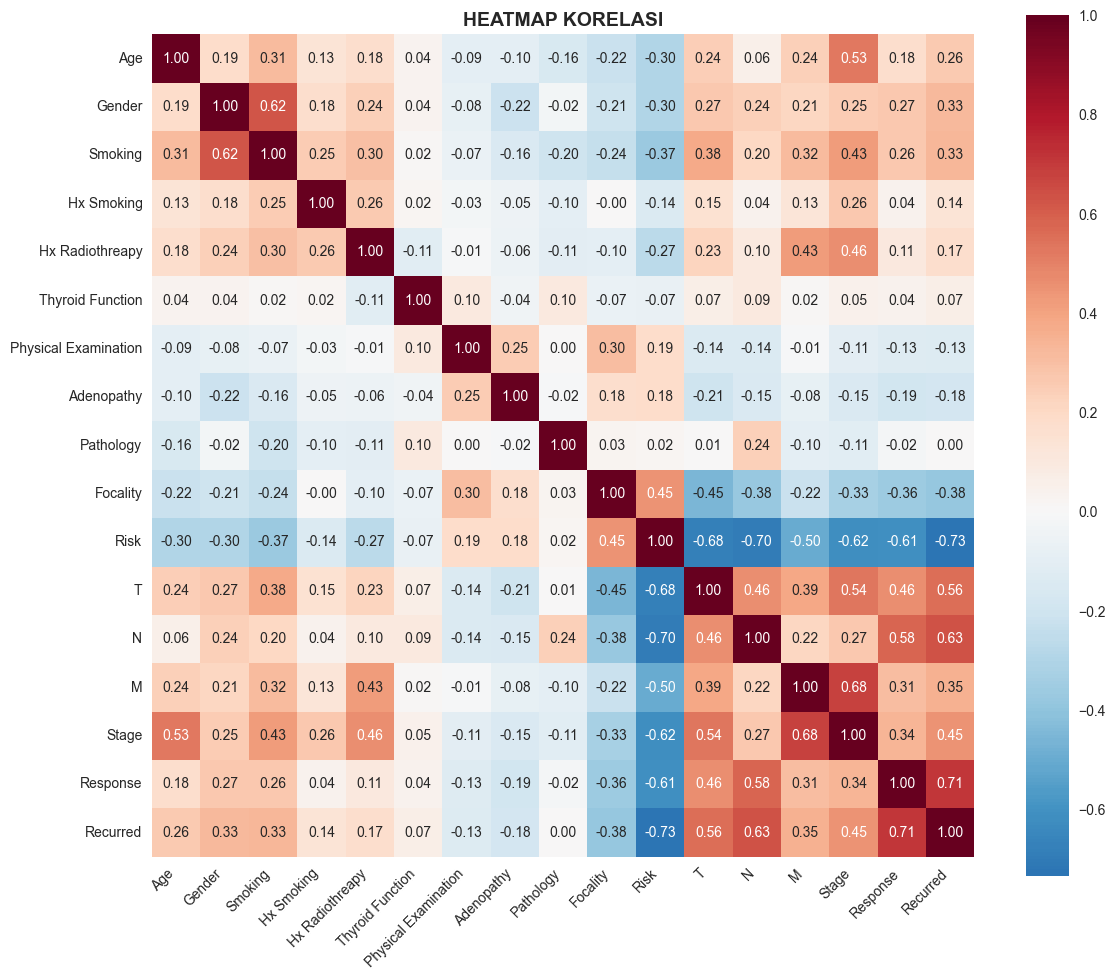


KORELASI TERHADAP VARIABEL TARGET (Recurred)
Korelasi dengan Recurred (Descending):
Response             : +0.709
N                    : +0.632
T                    : +0.556
Stage                : +0.449
M                    : +0.354
Smoking              : +0.333
Gender               : +0.328
Age                  : +0.259
Hx Radiothreapy      : +0.174
Hx Smoking           : +0.136
Thyroid Function     : +0.068
Pathology            : +0.003
Physical Examination : -0.132
Adenopathy           : -0.183
Focality             : -0.384
Risk                 : -0.733

VARIABEL DENGAN KORELASI KUAT (|r| > 0.3)
Response             : +0.709 (SANGAT KUAT POSITIF)
N                    : +0.632 (SANGAT KUAT POSITIF)
T                    : +0.556 (SANGAT KUAT POSITIF)
Stage                : +0.449 (KUAT POSITIF)
M                    : +0.354 (KUAT POSITIF)
Smoking              : +0.333 (KUAT POSITIF)
Gender               : +0.328 (KUAT POSITIF)
Focality             : -0.384 (KUAT NEGATIF)
Risk       

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_corr = df.copy()

# encoding variabel kategorikal untuk korelasi
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode semua variabel kategorikal
categorical_columns = df_corr.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# hitung matriks korelasi
correlation_matrix = df_corr.corr()

# buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           fmt='.2f',
           square=True)
plt.title('HEATMAP KORELASI', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# tampilkan korelasi tertinggi dengan target (Recurred)
print("\n" + "="*70)
print("KORELASI TERHADAP VARIABEL TARGET (Recurred)")
print("="*70)

recurred_corr = correlation_matrix['Recurred'].sort_values(ascending=False)
print("Korelasi dengan Recurred (Descending):")
for feature, corr in recurred_corr.items():
    if feature != 'Recurred':
        print(f"{feature:20} : {corr:+.3f}")

# highlight korelasi kuat
print("\n" + "="*50)
print("VARIABEL DENGAN KORELASI KUAT (|r| > 0.3)")
print("="*50)
strong_corr = recurred_corr[(abs(recurred_corr) > 0.3) & (recurred_corr.index != 'Recurred')]
for feature, corr in strong_corr.items():
    strength = "SANGAT KUAT" if abs(corr) > 0.5 else "KUAT"
    direction = "POSITIF" if corr > 0 else "NEGATIF"
    print(f"{feature:20} : {corr:+.3f} ({strength} {direction})")

# analisis korelasi antar feature
print("\n" + "="*50)
print("KORELASI ANTAR FEATURE TERKUAT")
print("="*50)
# cari korelasi tinggi antar feature (bukan dengan diri sendiri)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.6:  # Threshold untuk korelasi kuat
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

# urutkan berdasarkan absolute korelasi
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for feat1, feat2, corr in high_corr_pairs[:10]:  # top 10
    print(f"{feat1:15} <-> {feat2:15} : {corr:+.3f}")

# Kesimpulan Analisis Dataset Prediksi Kekambuhan Kanker Tiroid

## **Gambaran Umum Dataset**
- **Jumlah Data**: 383 record pasien kanker tiroid
- **Variabel**: 16 fitur (1 numerik, 15 kategorikal)
- **Variabel Target**: *Recurred* (Status Kekambuhan)
- **Distribusi Kelas**:
  - **Tidak Kambuh**: 275 pasien (71.8%)
  - **Kambuh**: 108 pasien (28.2%)
  - **Ratio**: 1:2 (setiap 1 pasien kambuh, 2 pasien tidak kambuh)

## **Hasil Analisis Statistik**
### **Variabel Numerik (Age)**:
- **Rata-rata Usia**: 40.87 tahun
- **Standar Deviasi**: 15.13 tahun
- **Rentang Usia**: 15-82 tahun
- **Distribusi**: Miring ke kanan (skewness = 0.72)
- **Kuartil**: Q1=29 tahun, Q2=37 tahun, Q3=51 tahun

### **Variabel Kategorikal**:
- **16 variabel** dengan jumlah kategori bervariasi (2-7 kategori)
- **Variabel biner**: Gender, Smoking, Hx Smoking, Hx Radiothreapy, M, Recurred

## **Prediktor Kekambuhan Berdasarkan Analisis Korelasi**
### **Prediktor Terkuat (Korelasi > 0.5)**:
1. **`Response`** (+0.709) - Respons terhadap pengobatan
2. **`N`** (+0.632) - Status penyebaran nodal
3. **`T`** (+0.556) - Klasifikasi ukuran tumor

### **Prediktor Menengah (Korelasi 0.3-0.5)**:
4. **`Stage`** (+0.449) - Stadium kanker
5. **`M`** (+0.354) - Status metastasis
6. **`Smoking`** (+0.333) - Kebiasaan merokok
7. **`Gender`** (+0.328) - Jenis kelamin

### **Temuan Tidak Terduga**:
- **`Risk`** (-0.733) - Korelasi negatif kuat (perlu investigasi)
- **`Focality`** (-0.384) - Tumor multifokal justru kurang kambuh

## **Pola Berdasarkan Stadium**
| Stadium | Total Pasien | % Kambuh | Keterangan |
|---------|-------------|----------|------------|
| **I** | 333 | 19.5% | Mayoritas tidak kambuh |
| **II** | 32 | 78.1% | Lonjakan drastis |
| **III** | 4 | 100% | Semua kambuh |
| **IVA** | 3 | 100% | Semua kambuh |
| **IVB** | 11 | 100% | Semua kambuh |

## **Masalah yang Ditemukan**:
1. **Variabel *Risk***: Korelasi negatif tidak sesuai ekspektasi klinis
2. **Duplikasi Data**: Variabel *Response* memiliki nilai 'Excellent' dan 'Excellent ' (dengan spasi)
3. **Encoding**: Perlu validasi konsistensi encoding variabel kategorikal